In this notebook we investigate the vertexes needed to LFVZD in the MLRSM using the UFO model of [Roitgrund2016](https://www.sciencedirect.com/science/article/pii/S0010465515004476?via%3Dihub)

In [1]:
#import sys
#sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO')

In [20]:
from UFOexplorer import UFOModelExplorer, ProjM, ProjP

In [21]:
ufo_directory ='C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix'
UFOModel = UFOModelExplorer(ufo_directory=ufo_directory)
UFOModel.load_model()


Loading particles from C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py...
Namespace keys after executing C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO_neutrino_mix\particles.py: ['__builtins__', 'division', 'all_particles', 'Particle', 'Param', 'Prop', 'a', 'Z', 'W__plus__', 'W__minus__', 'g', 'W2__plus__', 'W2__minus__', 'Z2', 'ghG', 'ghG__tilde__', 'e__minus__', 'e__plus__', 'mu__minus__', 'mu__plus__', 'ta__minus__', 'ta__plus__', 'u', 'u__tilde__', 'c', 'c__tilde__', 't', 't__tilde__', 'd', 'd__tilde__', 's', 's__tilde__', 'b', 'b__tilde__', 'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'H', 'H01', 'H02', 'H03', 'G01', 'G02', 'GL__plus__', 'GL__minus__', 'GR__plus__', 'GR__minus__', 'HP1', 'HM1', 'HP2', 'HM2', 'HL__plus____plus__', 'HL__minus____minus__', 'HR__plus____plus__', 'HR__minus____minus__', 'A01', 'A02']
Namespace contents after executing C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/MLRSM_UFO

In [22]:
UFOModel.summarize_model()


Model Summary:
Particles: 54
Parameters: 1377
Couplings: 1512
Lorentz Structures: 23
Vertices: 1638
Decays: 29


In [23]:
vertexHN1N2 = UFOModel.find_vertices_involving(['H','N1','N2'])[0]
print(vertexHN1N2.nice_string())

name 	: V_568
particles 	: [N2, N1, H]
color 	: ['1']
lorentz 	: [FFS1, FFS3]
couplings 	: {(0, 0): GC_941, (0, 1): GC_984}


In [24]:
fr_HN1N2 = UFOModel.generate_symbolic_feynman_rule(vertexHN1N2)
print(fr_HN1N2)

I*(-I13a12*ProjM(2, 1) - I13a21*ProjM(2, 1) - I14a12*ProjM(2, 1) - I14a21*ProjM(2, 1) - I15a12*ProjP(2, 1) - I15a21*ProjP(2, 1) - I16a12*ProjP(2, 1) - I16a21*ProjP(2, 1))/(2*vev)


In [25]:
from UFOexplorer import ProjM, ProjP
from sympy import factor

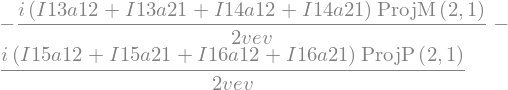

In [26]:
fr_HN1N2.expand().collect([ProjM(2,1), ProjP(2,1)], factor)

In [5]:
#feynman_rules = UFOModel.list_feynman_rules(number_particles=3)

# Calculating the lepton Flavor violating Higgs decays

We start considering the LFVHD. As we know in the Manifest Left-Right Symmetric model,  we have 4 neutral scalars $H_r^0$ with $r=0,1,2,3$, and $H_0^0 = h^{\text{SM}}$, there are two singly charged Higgs $H_{1,2}^\pm$ y two doubly charged Higgs $H_{L,R}^{\pm \pm}$, all this scalars represents 12 degrees of freedom of the model. Also we have two neutral vector bosons $Z$ and $Z_2$, also, we have two charged vector bosons $W^\pm$ and $W_2^\pm$.Adittionally, we have to neutral $G_{1,2}^0$ and two charged $G_{L,R}^\pm$ goldstone bosons, associated to the corresponding vector neutral and charged bosons.

With our UFOModelExplorer class we are able to explore the feynman rules of the MLRSM UFO files and classify them as we did it.

In [27]:
import sys
sys.path.append('C:/Users/moise/OneDrive/Escritorio/LRSM-with-Spheno/UFOmodel/LFVXD')


In [28]:
from sympy import init_printing
init_printing()

## Higgs diagrams

### Triangle FSS

In [32]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FSS

In [33]:
triangle_fss = construct_triangle_diagram_FSS(
    loop_fermion='N1',
    scalar1='HP1',
    scalar2='HM1',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fss)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalars in loop: HP1, HM1
Coefficient vertex H-HP1-HM1: 
 -I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)
Coefficient vertex HP1-mu--N1: 
 {'ProjP': I*I43a12/(2*vR) + I*I44a12/(2*vR)}
Coefficient vertex HM1-ta+-N1: 
 {'ProjM': I*I51a13/(2*vR) + I*I52a13/(2*vR)}
TriangleFSS(VertexSSS(-I*(2*alpha1*k1**2 + 2*alpha1*k2**2 + 8*alpha2*k1*k2 + alpha3*k1**2 + alpha3*k2**2)/(2*vev)), VertexSFF(I*I43a12/(2*vR) + I*I44a12/(2*vR),0), {self.v3!r}, {self.masas!r})


### Triangle FVV

In [36]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FVV

In [37]:
triangle_fvv = construct_triangle_diagram_FVV(
    loop_fermion='N1',
    vector1='W+',
    vector2='W-',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fvv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vectors in loop: W+, W-
Coefficient vertex H-W+-W-: 
 I*gw**2*(cxi**2*k1**2 + cxi**2*k2**2 + 4*cxi*k1*k2*sxi + k1**2*sxi**2 + k2**2*sxi**2)/(2*vev)
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleFVV(VertexSVV(I*gw**2*(cxi**2*k1**2 + cxi**2*k2**2 + 4*cxi*k1*k2*sxi + k1**2*sxi**2 + k2**2*sxi**2)/(2*vev)), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [38]:
from LFVXD.PaVe2 import D as D
from LFVXD.PaVe2 import Δe

In [39]:
AL_NiWW = triangle_fvv.AL().subs(D,4)

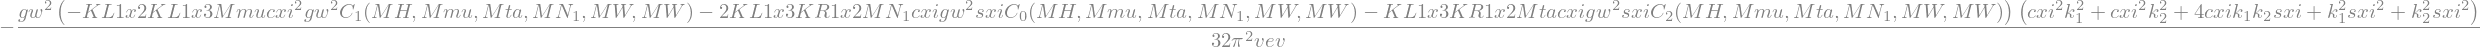

In [40]:
AL_NiWW

### Triangles FVS and FSV

In [41]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FVS

In [42]:
triangle_fvs = construct_triangle_diagram_FVS(
    loop_fermion='N1',
    vector='W+',
    scalar='HM2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fvs)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector and scalar in loop: W+, HM2
Coefficient vertex H-W+-HM2: 
 I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
TriangleFVV(VertexVSS(I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [43]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FSV

In [44]:
triangle_fsv = construct_triangle_diagram_FSV(
    loop_fermion='N1',
    scalar='HP2',
    vector='W-',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fsv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar and vector in loop: HP2, W-
Coefficient vertex H-HP2-W-: 
 -I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleFVV(VertexVSS(-I*gw*sxi*(k1 - k2)*(k1 + k2)/(2*vev**2)), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev),2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev)), 

### Bubble FV

In [46]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FV

In [47]:

triangle_fv = construct_triangle_diagram_FV(
    loop_fermion='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fv)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector in loop: W+
Coefficient vertex H-ta+-ta-: 
 {'ProjM': -I*yML3x3/vev, 'ProjP': -I*yML3x3/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
BubbleFV(VertexSFF(-I*yML3x3/vev,-I*yML3x3/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [49]:
from sympy import factor

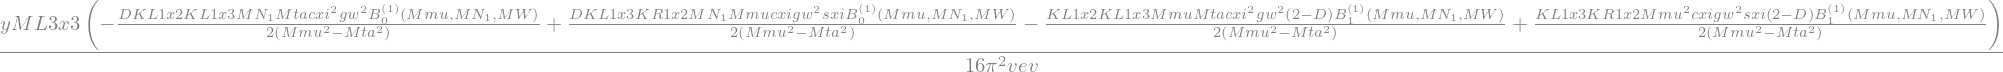

In [50]:
triangle_fv.AL()

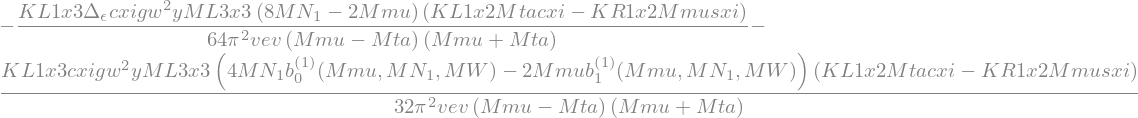

In [51]:
AL_tr_fv = triangle_fv.AL().doit().expand().collect([Δe], factor).subs(D, 4)
AL_tr_fv

### Bubble VF

In [54]:
from construct_lfvhd_diagrams import construct_triangle_diagram_VF

In [55]:
triangle_vf = construct_triangle_diagram_VF(
    loop_fermion='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_vf)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Vector in loop: W+
Coefficient vertex H-mu--mu+: 
 {'ProjM': -I*yML2x2/vev, 'ProjP': -I*yML2x2/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
BubbleFV(VertexSFF(-I*yML2x2/vev,-I*yML2x2/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


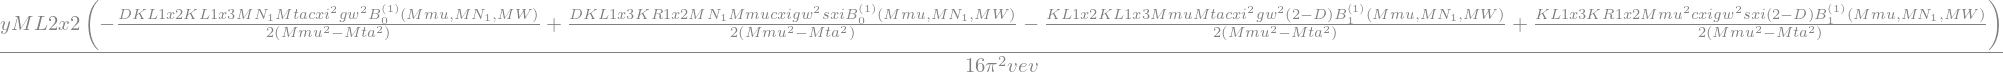

In [56]:
triangle_vf.AL()

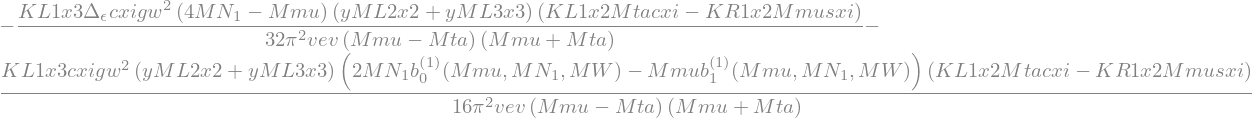

In [57]:
(triangle_vf.AL() + triangle_fv.AL()).subs(D, 4).doit().expand().collect([Δe], factor)

### Bubble FS

In [58]:
from construct_lfvhd_diagrams import construct_triangle_diagram_FS

In [59]:

triangle_fs = construct_triangle_diagram_FS(
    loop_fermion='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_fs)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar in loop: HP2
Coefficient vertex H-ta+-ta-: 
 {'ProjM': -I*yML3x3/vev, 'ProjP': -I*yML3x3/vev}
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
BubbleFS(VertexSFF(-I*yML3x3/vev,-I*yML3x3/vev), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(

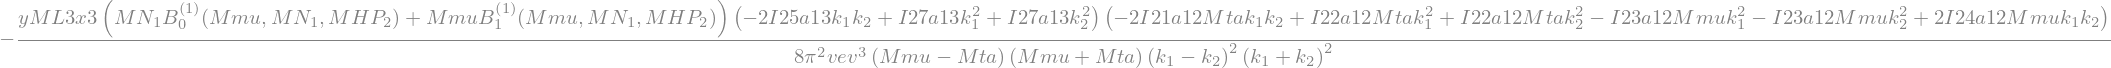

In [60]:
triangle_fs.AL().factor()

### Bubble SF

In [61]:
from construct_lfvhd_diagrams import construct_triangle_diagram_SF

In [62]:

triangle_sf = construct_triangle_diagram_SF(
    loop_fermion='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_sf)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1
Scalar in loop: HP2
Coefficient vertex H-mu--mu+: 
 {'ProjM': -I*yML2x2/vev, 'ProjP': -I*yML2x2/vev}
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
BubbleFS(VertexSFF(-I*yML2x2/vev,-I*yML2x2/vev), VertexSFF(sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(

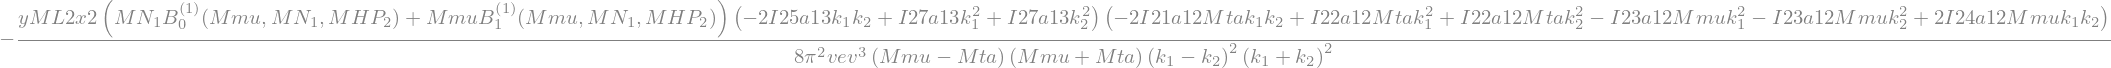

In [63]:
triangle_sf.AL().factor()

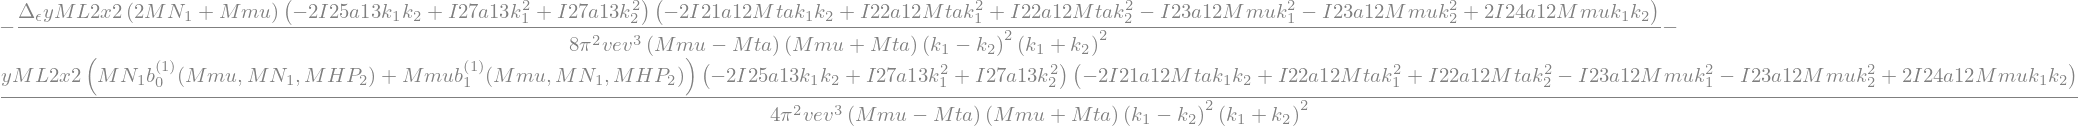

In [64]:
(triangle_sf.AL() + triangle_sf.AL()).subs(D, 4).doit().expand().collect([Δe], factor)


## Two fermions in the loop

### Triangle SFF

In [65]:
from construct_lfvhd_diagrams import construct_triangle_diagram_SFF

In [66]:
triangle_sff = construct_triangle_diagram_SFF(
    loop_fermion1='N1',
    loop_fermion2='N1',
    scalar='HP2',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_sff)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1, N1
Vector in loop: HP2
Coefficient vertex H-N1-N1: 
 {'ProjM': -I*I13a11/vev - I*I14a11/vev, 'ProjP': -I*I15a11/vev - I*I16a11/vev}
Coefficient vertex HP2-mu--N1: 
 {'ProjM': 2*sqrt(2)*I*I21a12*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I22a12*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': sqrt(2)*I*I23a12*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I23a12*k2**2/(k1**2*vev - k2**2*vev) - 2*sqrt(2)*I*I24a12*k1*k2/(k1**2*vev - k2**2*vev)}
Coefficient vertex HM2-ta+-N1: 
 {'ProjM': -2*sqrt(2)*I*I25a13*k1*k2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k1**2/(k1**2*vev - k2**2*vev) + sqrt(2)*I*I27a13*k2**2/(k1**2*vev - k2**2*vev), 'ProjP': 2*sqrt(2)*I*I26a13*k1*k2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k1**2/(k1**2*vev - k2**2*vev) - sqrt(2)*I*I28a13*k2**2/(k1**2*vev - k2**2*vev)}
TriangleSFF(VertexSFF(-I*I15a11/vev - I*I16a11/vev,-I*I13a11/vev - I*I14a11/vev), VertexSFF(sqrt(2)*

In [67]:
print(triangle_sff.AL().factor())

-(-2*I25a13*k1*k2 + I27a13*k1**2 + I27a13*k2**2)*(-2*I13a11*I21a12*MN1**2*k1*k2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - 2*I13a11*I21a12*MN1*Mmu*k1*k2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + 2*I13a11*I21a12*MN1*Mmu*k1*k2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1**2*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1**2*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1*Mmu*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I22a12*MN1*Mmu*k1**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I22a12*MN1*Mmu*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I22a12*MN1*Mmu*k2**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k1**2*C2(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k2**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*MN1*Mta*k2**2*C2(MH, Mmu, Mta, MHP2, MN1, MN1) - I13a11*I23a12*Mmu*Mta*k1**2*C0(MH, Mmu, Mta, MHP2, MN1, MN1) + I13a11*I23a12*Mmu*Mta*k1**2*C1(MH, Mmu, Mta, MHP2, MN1, MN1) - I

## Triangle FVV

In [68]:
from construct_lfvhd_diagrams import construct_triangle_diagram_VFF

In [69]:
triangle_vff = construct_triangle_diagram_VFF(
    loop_fermion1='N1',
    loop_fermion2='N1',
    vector='W+',
    external_scalars=['H'],
    external_fermions=['mu-', 'ta+'],
    ufo_model=UFOModel
)
print(triangle_vff)

External scalar: H
External fermions: ['mu-', 'ta+']
Loop fermion: N1, N1
Vector in loop: W+
Coefficient vertex H-N1-N1: 
 {'ProjM': -I*I13a11/vev - I*I14a11/vev, 'ProjP': -I*I15a11/vev - I*I16a11/vev}
Coefficient vertex W+-mu--N1: 
 {'ProjM': sqrt(2)*I*KL1x2*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x2*gw*sxi/2}
Coefficient vertex W--ta+-N1: 
 {'ProjM': sqrt(2)*I*KL1x3*cxi*gw/2, 'ProjP': -sqrt(2)*I*KR1x3*gw*sxi/2}
TriangleVFF(VertexSFF(-I*I15a11/vev - I*I16a11/vev,-I*I13a11/vev - I*I14a11/vev), VertexVFF(-sqrt(2)*I*KR1x2*gw*sxi/2,sqrt(2)*I*KL1x2*cxi*gw/2), {self.v3!r},{self.masas!r})


In [70]:
print(triangle_vff.AL().factor())

-KL1x3*cxi*gw**2*(-D*I13a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*MW**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I13a11*KL1x2*Mmu**2*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*Mta**2*cxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I13a11*KL1x2*cxi*B12_0(MH, MN1, MN1) - D*I13a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) - D*I14a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*MW**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I14a11*KL1x2*Mmu**2*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*Mta**2*cxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I14a11*KL1x2*cxi*B12_0(MH, MN1, MN1) - D*I14a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) + D*I15a11*KL1x2*MN1**2*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) + D*I15a11*KL1x2*MN1*Mmu*cxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KL1x2*MN1*Mmu*cxi*C1(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KR1x2*MN1*Mta*sxi*C0(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11*KR1x2*MN1*Mta*sxi*C2(MH, Mmu, Mta, MW, MN1, MN1) - D*I15a11